In [252]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from tqdm import tqdm
import time
from networkx.algorithms import tree

In [253]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: float,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

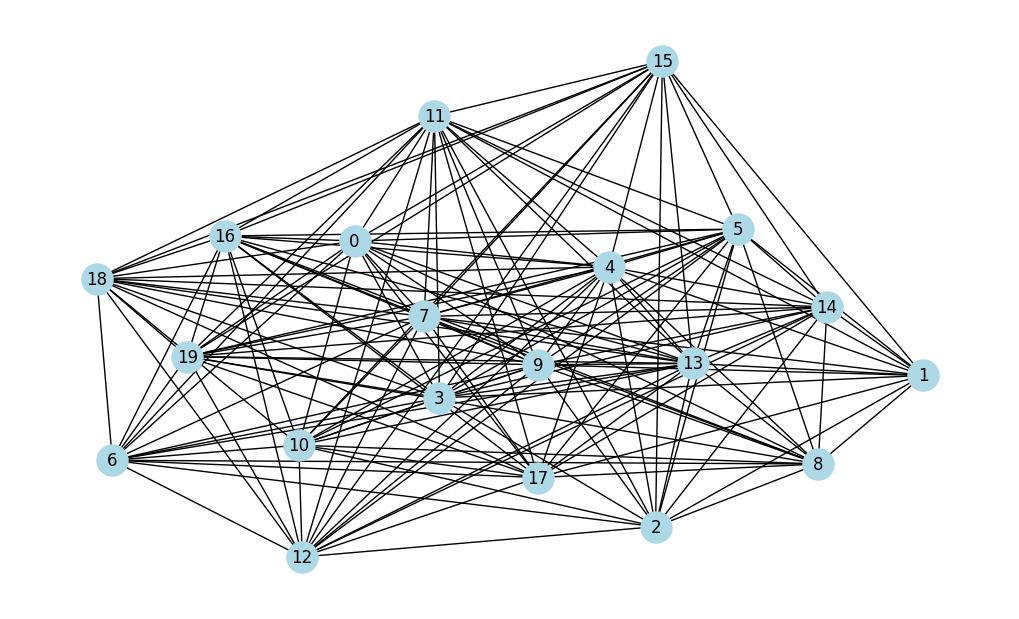

In [254]:
G = gnp_random_connected_graph(20, 0.8, False, True)

In [256]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

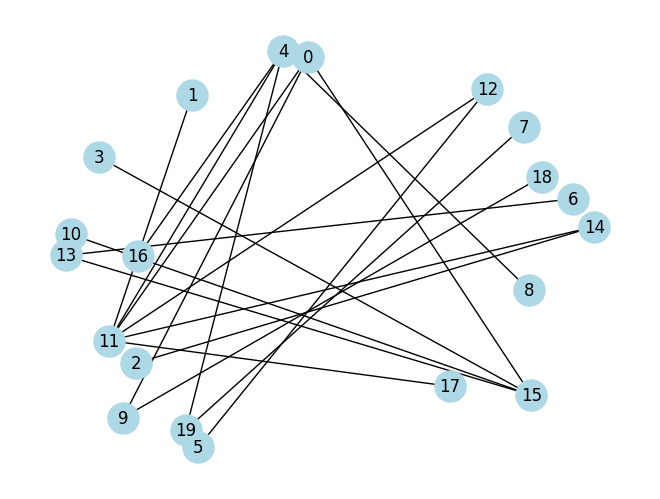

In [257]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [258]:

def kruskal_graph(graph):
    edges = sorted(list(graph.edges(data=True)), key=lambda x: x[2]['weight'])
    breaking = [{i} for i in graph.nodes()]
    kruskal = []
    for edge in edges:
        if len(breaking) == 1:
            break
        for j in breaking:
            if edge[0] in j:
                break
        for k in breaking:
            if edge[1] in k and k != j:
                breaking.remove(k)
                breaking.remove(j)
                j = j.union(k)
                breaking.append(j)
                kruskal.append((edge[0], edge[1]))
                break
    return kruskal
kruskal_graph(G)


[(4, 19),
 (4, 11),
 (5, 12),
 (7, 19),
 (3, 15),
 (4, 8),
 (4, 16),
 (6, 13),
 (0, 11),
 (0, 15),
 (11, 17),
 (13, 15),
 (9, 18),
 (10, 15),
 (11, 12),
 (0, 9),
 (2, 14),
 (11, 14),
 (1, 11)]

In [260]:
def find_time(vertixes: int, posibility: float, directed: bool):
    """find the time of algorithm"""
    NUM_OF_ITERATIONS = 10
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):
        G = gnp_random_connected_graph(vertixes, posibility, directed)
        start = time.time()
        kruskal_graph(G)
        end = time.time()
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS



In [274]:
def graph_plotting(posibility: float, directed: bool):
    """"""
    # x-coordinates of left sides of bars
    left = [1, 2, 3, 4, 5, 6]
    # heights of bars
    ten = find_time(10, posibility, directed)
    twenty = find_time(20, posibility, directed)
    fifty = find_time(50, posibility, directed)
    hundred = find_time(100, posibility, directed)
    two_hundred = find_time(200, posibility, directed)
    five_hundred = find_time(500, posibility, directed)
    height = [ten, twenty, fifty, hundred, two_hundred, five_hundred]
    # labels for bars
    tick_label = ['10', '20', '50', '100', '200', '500']
    # plotting a bar chart
    plt.bar(left, height, tick_label = tick_label,
            width = 0.8, color = ['orange', 'blue'])
    # naming the x-axis
    plt.xlabel('No. of nodes')
    # naming the y-axis
    plt.ylabel('Time')
    # plot title
    plt.title('Bar chart')
    # function to show the plot
    plt.show()


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


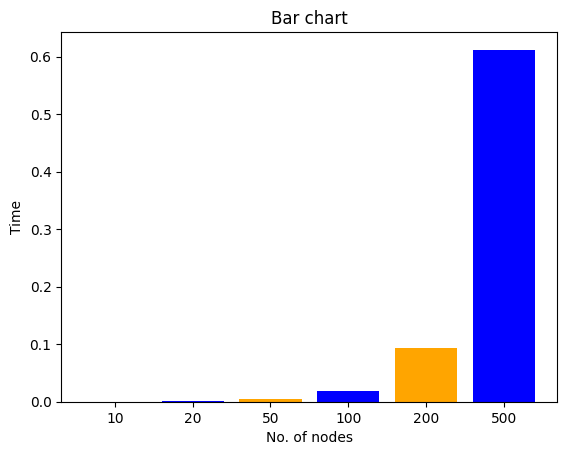

In [275]:
graph_plotting(1, False)